In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import seaborn as sns
import plotly.express as px
%matplotlib inline

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected = False)

**Cargar el conjunto de datos en el entorno de trabajo**

**Realizar una revisión general**
<br>**dataset original**

In [15]:
#Importación de dataset desde github
url = 'https://github.com/No-Country-simulation/c22-34-n-data-bi/raw/main/DATA/afluencia_diaria_pasajeros_10_2024_limpios.csv'

df_1 = pd.read_csv(url)

HTTPError: HTTP Error 404: Not Found

In [2]:
#Importación desde archivo local
df_1 = pd.read_csv(r'C:\Users\Usuario\Desktop\descargas de pdfs\NOCOUNTRY\grupo propio\dataset\angela\afluencia_diaria_pasajeros_10_2024_limpios.csv', 
                   encoding='latin1', sep=';', low_memory=False)

In [3]:
df_1.shape

(26266, 7)

In [4]:
# detalle
df_1.head()

date  month  year               service type_paiment  affluence  \
0  1/1/2022  Enero  2022  Servicios Temporales       Boleto          0   
1  1/1/2022  Enero  2022  Servicios Temporales      Prepago          0   
2  1/1/2022  Enero  2022  Servicios Temporales    Gratuidad          0   
3  1/1/2022  Enero  2022                Atenea       Boleto       2702   
4  1/1/2022  Enero  2022                Atenea      Prepago          0   

   num_month  
0          1  
1          1  
2          1  
3          1  
4          1

In [5]:
# tamaño en filas y columnas del dataset original
df_1.shape

(26266, 7)

In [6]:
df=df_1

In [7]:
#Mostrar los primeras filas del dataframe resultante
df.head()

date  month  year               service type_paiment  affluence  \
0  1/1/2022  Enero  2022  Servicios Temporales       Boleto          0   
1  1/1/2022  Enero  2022  Servicios Temporales      Prepago          0   
2  1/1/2022  Enero  2022  Servicios Temporales    Gratuidad          0   
3  1/1/2022  Enero  2022                Atenea       Boleto       2702   
4  1/1/2022  Enero  2022                Atenea      Prepago          0   

   num_month  
0          1  
1          1  
2          1  
3          1  
4          1

In [8]:
df.shape

(26266, 7)

In [9]:
#Mostrar las ultimas filas del dataframe resultante
df.tail()

date    month  year    service type_paiment  affluence  num_month
26261  31/10/2024  Octubre  2024  ORDINARIO      Prepago      60887         10
26262  31/10/2024  Octubre  2024  ORDINARIO    Gratuidad      12157         10
26263  31/10/2024  Octubre  2024    S/METRO       Boleto       3442         10
26264  31/10/2024  Octubre  2024    S/METRO      Prepago      31434         10
26265  31/10/2024  Octubre  2024    S/METRO    Gratuidad       6872         10

In [10]:

#Nuevo tamaño del dataframe
df.shape

(26266, 7)

**Información general del DataFrame**
***---tipo de datos---***

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26266 entries, 0 to 26265
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          26266 non-null  object
 1   month         26266 non-null  object
 2   year          26266 non-null  int64 
 3   service       26266 non-null  object
 4   type_paiment  26266 non-null  object
 5   affluence     26266 non-null  int64 
 6   num_month     26266 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 1.4+ MB


**Verificar si existen filas duplicadas o espacios vacios.**

In [12]:
# verificar filas duplicadas
duplicados=df[df.duplicated()]
if duplicados.empty:
    print("No hay filas duplicadas en el DataFrame.")
else:
    print("Las siguientes filas están duplicadas:")
    print(duplicados)

No hay filas duplicadas en el DataFrame.


In [13]:
# verificar espacios vacios
hay_vacios = df.isna().any().any()

if hay_vacios:
    print("El DataFrame contiene valores vacíos.")
else:
    print("El DataFrame no contiene valores vacíos.")

El DataFrame no contiene valores vacíos.


***De acuerdo a la informacion anterior, luego deberemos tratar las columnas precio y ventas***

In [14]:
# Cantidad de valores nulos por columna
missing_data = df.isna().sum()
print(missing_data[missing_data > 0])

Series([], dtype: int64)


In [15]:
df.head(100)

date  month  year               service type_paiment  affluence  \
0   1/1/2022  Enero  2022  Servicios Temporales       Boleto          0   
1   1/1/2022  Enero  2022  Servicios Temporales      Prepago          0   
2   1/1/2022  Enero  2022  Servicios Temporales    Gratuidad          0   
3   1/1/2022  Enero  2022                Atenea       Boleto       2702   
4   1/1/2022  Enero  2022                Atenea      Prepago          0   
..       ...    ...   ...                   ...          ...        ...   
95  4/1/2022  Enero  2022            Expdirecto    Gratuidad        314   
96  4/1/2022  Enero  2022               Expreso       Boleto      47758   
97  4/1/2022  Enero  2022               Expreso      Prepago       5535   
98  4/1/2022  Enero  2022               Expreso    Gratuidad       8309   
99  4/1/2022  Enero  2022              Nochebús       Boleto        724   

    num_month  
0           1  
1           1  
2           1  
3           1  
4           1  
..        ...  
95          1  
96          1  
97          1  
98          1  
99          1  

[100 rows x 7 columns]

In [16]:
# Cantidad de valores nulos por columna
missing_data = df.isna().sum()
print(missing_data[missing_data > 0])

Series([], dtype: int64)


In [17]:
df.head()

date  month  year               service type_paiment  affluence  \
0  1/1/2022  Enero  2022  Servicios Temporales       Boleto          0   
1  1/1/2022  Enero  2022  Servicios Temporales      Prepago          0   
2  1/1/2022  Enero  2022  Servicios Temporales    Gratuidad          0   
3  1/1/2022  Enero  2022                Atenea       Boleto       2702   
4  1/1/2022  Enero  2022                Atenea      Prepago          0   

   num_month  
0          1  
1          1  
2          1  
3          1  
4          1

In [18]:
valores_distintos = sorted(df['service'].unique())
print("Valores distintos (ordenados):")
print(valores_distintos)

Valores distintos (ordenados):
['ATENEA', 'Apoyo Concesionado', 'Apoyo Metro L1', 'Apoyo concesionado', 'Atenea', 'CIRCUITO HOSPITALES', 'Circuito Hospitales', 'Circuito Hospitales $8.00', 'ECOB?S', 'EXPDIRECTO', 'EXPRESO', 'Ecoatenea', 'Ecobús', 'Expdirecto', 'Expreso', 'Expreso Directo', 'NOCHEB?S', 'Nochebús', 'ORDINARIO', 'Ordinario', 'S/METRO', 'S/Metro', 'SERVICIOS TEMPORALES', 'Servicios Temporales']


**nombres de columnas**


In [19]:
df.columns

Index(['date', 'month', 'year', 'service', 'type_paiment', 'affluence',
       'num_month'],
      dtype='object')

In [20]:
df.head()

date  month  year               service type_paiment  affluence  \
0  1/1/2022  Enero  2022  Servicios Temporales       Boleto          0   
1  1/1/2022  Enero  2022  Servicios Temporales      Prepago          0   
2  1/1/2022  Enero  2022  Servicios Temporales    Gratuidad          0   
3  1/1/2022  Enero  2022                Atenea       Boleto       2702   
4  1/1/2022  Enero  2022                Atenea      Prepago          0   

   num_month  
0          1  
1          1  
2          1  
3          1  
4          1

In [21]:
# Columnas traducidas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26266 entries, 0 to 26265
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          26266 non-null  object
 1   month         26266 non-null  object
 2   year          26266 non-null  int64 
 3   service       26266 non-null  object
 4   type_paiment  26266 non-null  object
 5   affluence     26266 non-null  int64 
 6   num_month     26266 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 1.4+ MB


In [22]:

#tamaño del nuevo dataframe
df.shape

(26266, 7)

**Conteo de valores únicos por columna:**

In [23]:
df.nunique()

date             1035
month              12
year                3
service            24
type_paiment        3
affluence       12980
num_month          12
dtype: int64

**Verificar si existen filas duplicadas o espacios vacios.**

In [24]:
# verificar filas duplicadas
duplicados=df[df.duplicated()]
if duplicados.empty:
    print("No hay filas duplicadas en el DataFrame.")
else:
    print("Las siguientes filas están duplicadas:")
    print(duplicados)

No hay filas duplicadas en el DataFrame.


In [25]:
# verificar espacios vacios
hay_vacios = df.isna().any().any()

if hay_vacios:
    print("El DataFrame contiene valores vacíos.")
else:
    print("El DataFrame no contiene valores vacíos.")

El DataFrame no contiene valores vacíos.


In [26]:
valores_distintos = sorted(df['month'].unique())
print("Valores distintos (ordenados):")
print(valores_distintos)

Valores distintos (ordenados):
['Abril', 'Agosto', 'Diciembre', 'Enero', 'Febrero', 'Julio', 'Junio', 'Marzo', 'Mayo', 'Noviembre', 'Octubre', 'Septiembre']


In [27]:
# Cantidad de valores nulos por columna
missing_data = df.isna().sum()
print(missing_data[missing_data > 0])

Series([], dtype: int64)


In [28]:
df.head()

date  month  year               service type_paiment  affluence  \
0  1/1/2022  Enero  2022  Servicios Temporales       Boleto          0   
1  1/1/2022  Enero  2022  Servicios Temporales      Prepago          0   
2  1/1/2022  Enero  2022  Servicios Temporales    Gratuidad          0   
3  1/1/2022  Enero  2022                Atenea       Boleto       2702   
4  1/1/2022  Enero  2022                Atenea      Prepago          0   

   num_month  
0          1  
1          1  
2          1  
3          1  
4          1

In [ ]:
# Cantidad de valores nulos por columna
missing_data = df_resultado.isna().sum()
print(missing_data[missing_data > 0])

In [30]:
# no quedan valores na

In [31]:
# hasta aqui esta bien

In [32]:
# FIN DE LA PRIMERA PARTE: Exploración Inicial de Datos

In [33]:
# 2 PARTE: ANALISIS UNIVARIADO

#Análisis Univariado:<br>
 ***Distribución de Variables:*** Realizar un análisis de las variables individuales para entender su distribución. Utilizar histogramas, boxplots y estadísticas descriptivas (media, mediana, desviación estándar, etc.) para las variables numéricas. Para las variables categóricas, calcular frecuencias y proporciones. <br>***Identificación de Outliers:*** Detectar posibles outliers en las variables numéricas utilizando técnicas como el análisis de boxplots o el cálculo del z-score.


In [34]:
#hay que renombrar las lineas-.----

# Analisis de algunas variables del dataframe

***Valores de Pago***

In [35]:
df.type_paiment.unique()

array(['Boleto', 'Prepago', 'Gratuidad'], dtype=object)

***Valores de servicio***

In [36]:
df.service.unique()

array(['Servicios Temporales', 'Atenea', 'Ecoatenea', 'Ecobús',
       'Expdirecto', 'Expreso', 'Nochebús', 'Ordinario', 'S/Metro',
       'Apoyo Metro L1', 'Circuito Hospitales', 'Expreso Directo',
       'Circuito Hospitales $8.00', 'Apoyo Concesionado',
       'Apoyo concesionado', 'ATENEA', 'ECOB?S', 'EXPRESO', 'NOCHEB?S',
       'ORDINARIO', 'S/METRO', 'EXPDIRECTO', 'CIRCUITO HOSPITALES',
       'SERVICIOS TEMPORALES'], dtype=object)

***Valores de Segmento de Clientes***

In [37]:
#EXPLORAMOS LOS DATOS:
#Obtenemos estadísticas descriptivas sobre las columnas numéricas del conjunto de datos:

In [38]:
df.describe()

year      affluence     num_month
count  26266.00000   26266.000000  26266.000000
mean    2022.91430   13099.603899      6.244118
std        0.81079   23602.472653      3.338865
min     2022.00000       0.000000      1.000000
25%     2022.00000     232.000000      3.000000
50%     2023.00000    2154.500000      6.000000
75%     2024.00000   15126.750000      9.000000
max     2024.00000  148014.000000     12.000000

# Graficas

In [39]:
#Numero de pasajeros y servicio
pasajeros_servicio=df.groupby(['service'])['affluence'].count().reset_index(name='numero de pasajeros').sort_values(by= 'numero de pasajeros', ascending= False)
fig=px.bar(pasajeros_servicio, x='service', y='numero de pasajeros'  , color='service',
      )
fig.show()


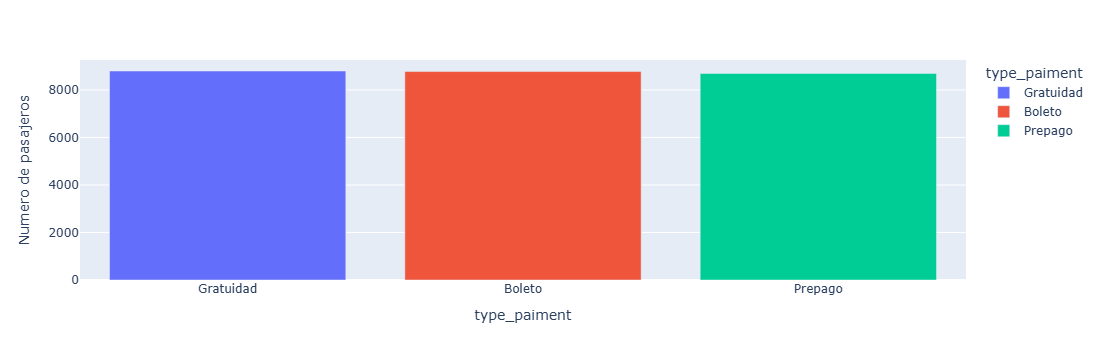

In [40]:
#Pasajeros y tipo de pago
pasajeros_pago=df.groupby(['type_paiment'])['affluence'].count().reset_index(name='Numero de pasajeros').sort_values(by= 'Numero de pasajeros', ascending= False)
fig=px.bar(pasajeros_pago, x='type_paiment', y='Numero de pasajeros'  , color='type_paiment' )
fig.show()

In [42]:
#Cantidad de productos segun categoria
pasajeros_anio=df.groupby(['year'])['affluence'].count().reset_index(name='cantidad de pasajeros').sort_values(by= 'cantidad de pasajeros', ascending= False)
fig=px.bar(pasajeros_anio, x='year', y='cantidad de pasajeros'  , color='year'
      )
fig.show()

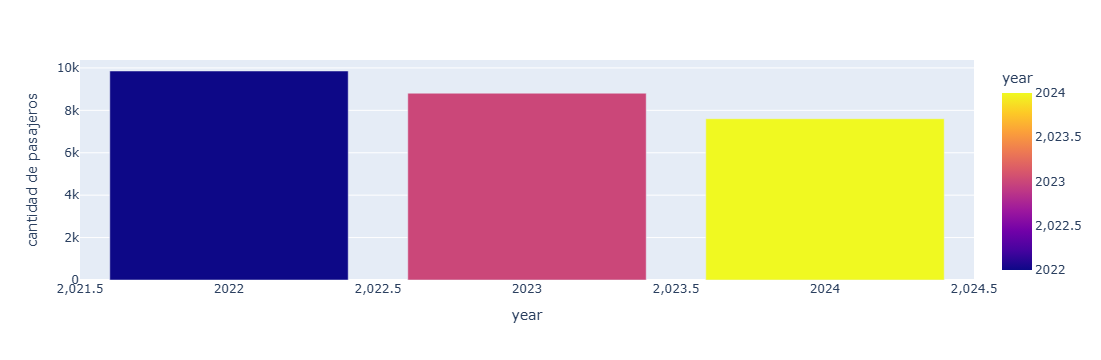

In [43]:
#Cantidad de productos segun categoria
pasajeros_mes=df.groupby(['month'])['affluence'].count().reset_index(name='cantidad de pasajeros').sort_values(by= 'cantidad de pasajeros', ascending= False)
fig=px.bar(pasajeros_mes, x='month', y='cantidad de pasajeros'  , color='month' )
fig.show()

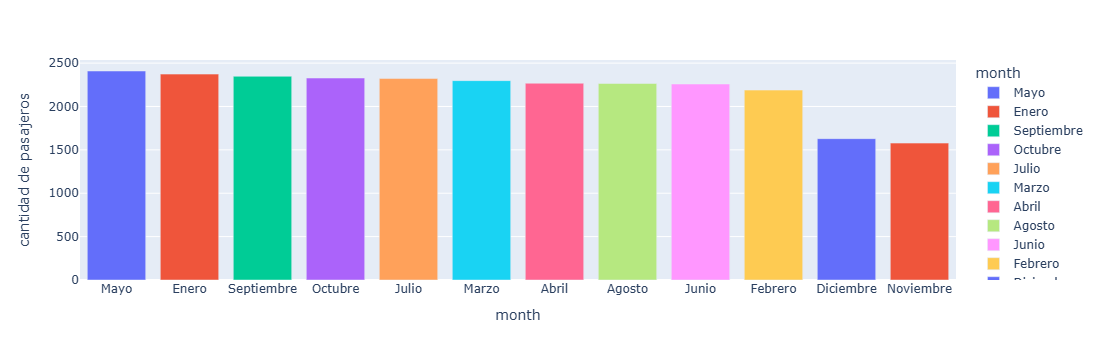

In [44]:
# Agrupar por año y mes, y sumar la afluencia
afluencia = df.groupby(['year', 'month'])['affluence'].sum().reset_index(name='afluencia_total')

# Ordenar por afluencia total de mayor a menor
afluencia = afluencia.sort_values(by='afluencia_total', ascending=False)

# Crear el gráfico de barras
fig = px.bar(afluencia, x='month', y='afluencia_total', color='year',
            barmode='group')  # Mostrar barras agrupadas por año
fig.show()

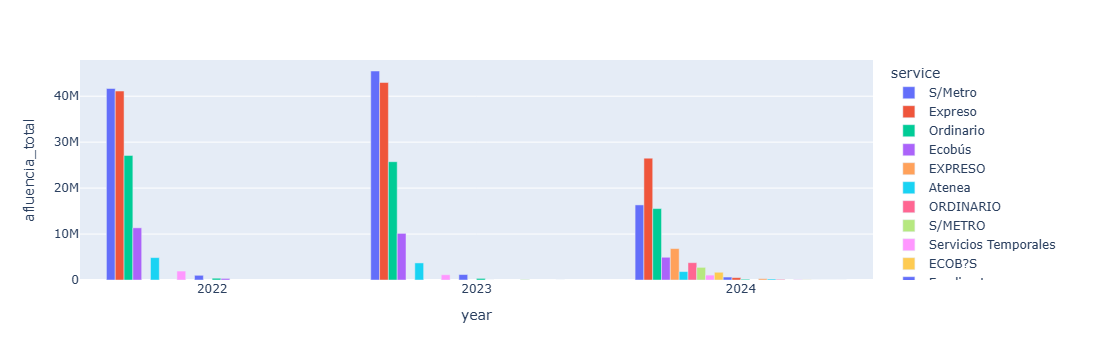

In [45]:
# Agrupar por año y mes, y sumar servicio
servicio = df.groupby(['year', 'service'])['affluence'].sum().reset_index(name='afluencia_total')

# Ordenar por servicio total de mayor a menor
servicio = servicio.sort_values(by='afluencia_total', ascending=False)

# Crear el gráfico de barras
fig = px.bar(servicio, x='year', y='afluencia_total', color='service',
            barmode='group')  # Mostrar barras agrupadas por año
fig.show()

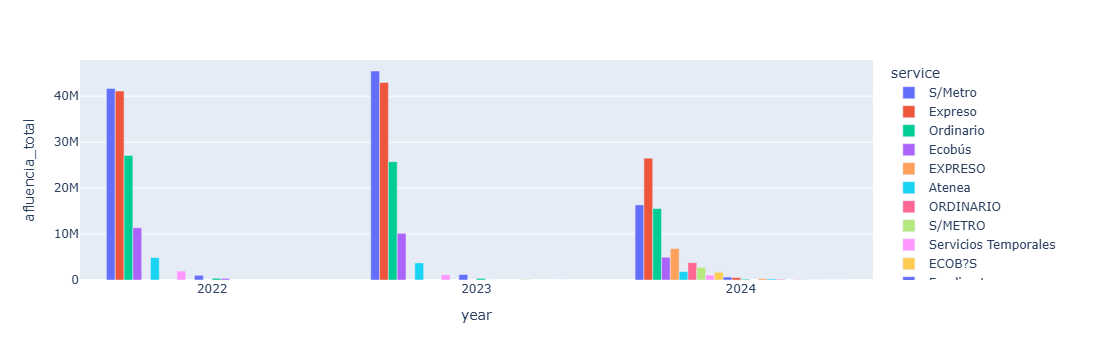

In [46]:
# Agrupar por año y mes, y sumar tipo de pago
pago = df.groupby(['year', 'type_paiment'])['affluence'].sum().reset_index(name='afluencia_total')

# Ordenar por tipo de pago total de mayor a menor
pago = pago.sort_values(by='afluencia_total', ascending=False)

# Crear el gráfico de barras
fig = px.bar(pago, x='year', y='afluencia_total', color='type_paiment',
            barmode='group')  # Mostrar barras agrupadas por año
fig.show()

# Segmento de Clientes

In [47]:
#Cantidad de afluencia segun el tipo de pago
data_Customer_Segment=df.groupby(['type_paiment'])['affluence'].count().reset_index(name='Numero de afluencias').sort_values(by= 'Numero de afluencias', ascending= False)
fig=px.pie(data_Customer_Segment, values='Numero de afluencias', names= 'type_paiment' , title= 'Numbero de afluencias segun tipo de pago',
       width=600 , height=600 , color_discrete_sequence = px.colors.qualitative.D3)
fig.show()

In [48]:
#Segmento de Clientes para un servicio en particular
df_servicio = df[df['service'] == 'Servicios Temporales']

data_Customer_Segment=df_servicio.groupby(['type_paiment'])['affluence'].count().reset_index(name='Numero de afluencias').sort_values(by= 'Numero de afluencias', ascending= False)
px.pie(data_Customer_Segment, values='Numero de afluencias', names= 'type_paiment' , title= 'Numbero de afluencias segun servicios temporales',
       width=600 , height=600 , color_discrete_sequence = ["red", "green", "blue", "goldenrod", "magenta"])

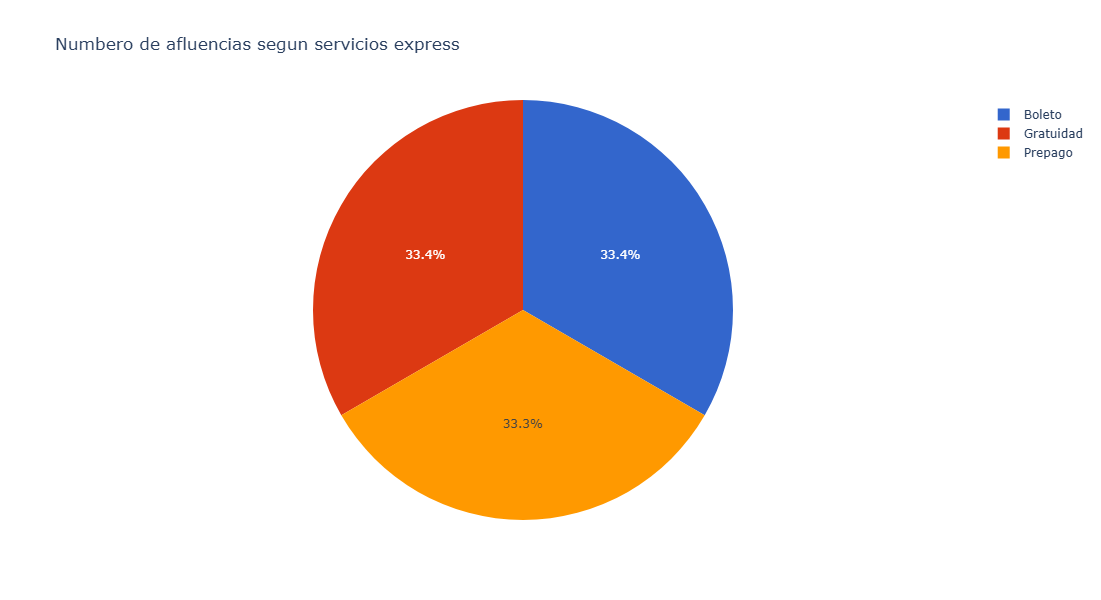

In [49]:
#Segmento de Clientes para la region de America del sur
df_servicio = df[df['service'] == 'Nochebús']

data_Customer_Segment=df_servicio.groupby(['type_paiment'])['affluence'].count().reset_index(name='Numero de afluencias').sort_values(by= 'Numero de afluencias', ascending= False)
px.pie(data_Customer_Segment, values='Numero de afluencias', names= 'type_paiment' , title= 'Numbero de afluencias segun servicios express',
       width=600 , height=600 , color_discrete_sequence = px.colors.qualitative.G10)

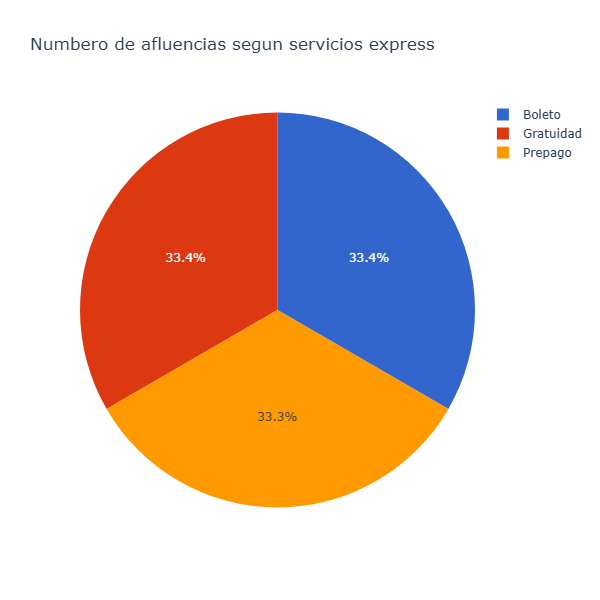

In [50]:
df.head()

date  month  year               service type_paiment  affluence  \
0  1/1/2022  Enero  2022  Servicios Temporales       Boleto          0   
1  1/1/2022  Enero  2022  Servicios Temporales      Prepago          0   
2  1/1/2022  Enero  2022  Servicios Temporales    Gratuidad          0   
3  1/1/2022  Enero  2022                Atenea       Boleto       2702   
4  1/1/2022  Enero  2022                Atenea      Prepago          0   

   num_month  
0          1  
1          1  
2          1  
3          1  
4          1

***#separar la fecha***

In [604]:

#data_orderdate['year']=data_orderdate['month'].astype(str)
df_sales_quarter=df.groupby([ 'year','month'])['affluence'].count().reset_index(name='afluencias').sort_values(by= 'afluencias', ascending= False)
fig=px.bar(df_sales_quarter, x='year',y = 'afluencias',color ='year')
fig.show()



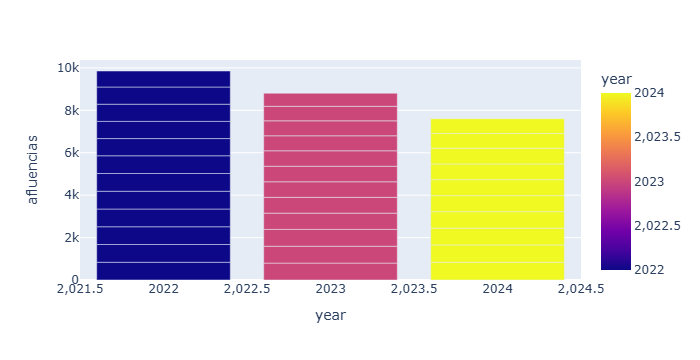

# Analaisis de afluencias segun el año

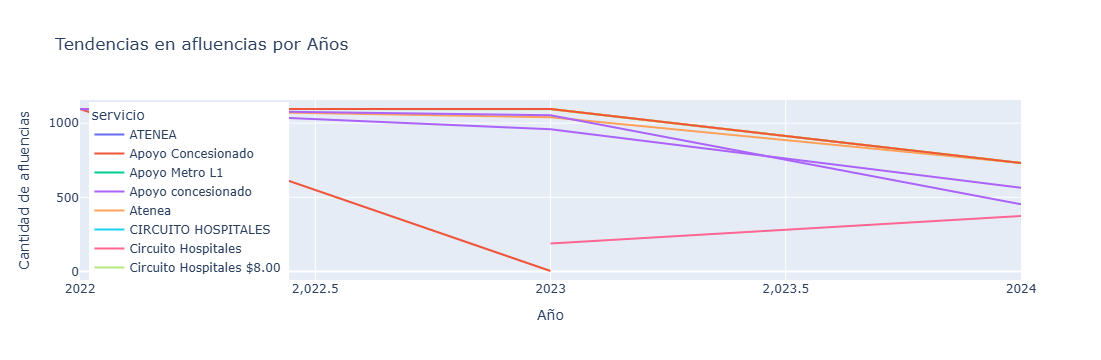

In [51]:
import pandas as pd
import plotly.graph_objects as go

#  'tendencias'
# 
tendencias = df.groupby(['service','year'])['affluence'].count().reset_index()

# Crear una figura
fig = go.Figure()

# Iterar a través de países únicos
for pais in tendencias['service'].unique():
    # Filtrar datos para el país actual
    data_pais = tendencias[tendencias['service'] == pais]
    
    # Agregar una línea para cada país
    fig.add_trace(go.Scatter(
        x=data_pais['year'],
        y=data_pais['affluence'],
        mode='lines',
        name=pais
    ))

# Personalizar el diseño del gráfico
fig.update_layout(
    title='Tendencias en afluencias por Años',
    xaxis_title='Año',
    yaxis_title='Cantidad de afluencias',
    legend_title_text='servicio',
    legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=0.01
    )
)

# Agregar líneas de cuadrícula
fig.update_xaxes(showgrid=True)
fig.update_yaxes(showgrid=True)

# Mostrar el gráfico
fig.show()

In [52]:
import pandas as pd
import plotly.graph_objects as go

#  'tendencias'
#
tendencias = df.groupby(['service','month'])['affluence'].count().reset_index()

# Crear una figura
fig = go.Figure()

# Iterar a través de países únicos
for pais in tendencias['service'].unique():
    # Filtrar datos para el país actual
    data_pais = tendencias[tendencias['service'] == pais]
    
    # Agregar una línea para cada país
    fig.add_trace(go.Scatter(
        x=data_pais['month'],
        y=data_pais['affluence'],
        mode='lines',
        name=pais
    ))

# Personalizar el diseño del gráfico
fig.update_layout(
    title='Tendencias en afluencias por Años',
    xaxis_title='Mes',
    yaxis_title='Cantidad de afluencias',
    legend_title_text='servicio',
    legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=0.01
    )
)

# Agregar líneas de cuadrícula
fig.update_xaxes(showgrid=True)
fig.update_yaxes(showgrid=True)

# Mostrar el gráfico
fig.show()

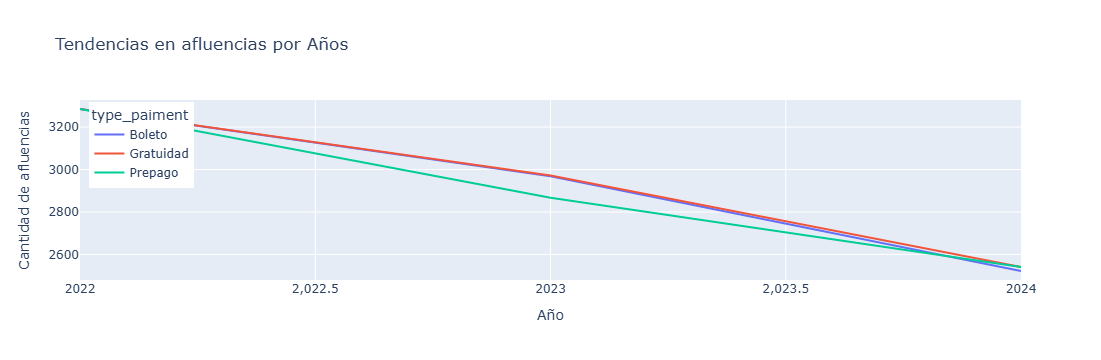

In [53]:
import pandas as pd
import plotly.graph_objects as go

#  'tendencias'
# 
tendencias = df.groupby(['type_paiment','year'])['affluence'].count().reset_index()

# Crear una figura
fig = go.Figure()

# Iterar a través de países únicos
for pais in tendencias['type_paiment'].unique():
    # Filtrar datos para el país actual
    data_pais = tendencias[tendencias['type_paiment'] == pais]
    
    # Agregar una línea para cada país
    fig.add_trace(go.Scatter(
        x=data_pais['year'],
        y=data_pais['affluence'],
        mode='lines',
        name=pais
    ))

# Personalizar el diseño del gráfico
fig.update_layout(
    title='Tendencias en afluencias por Años',
    xaxis_title='Año',
    yaxis_title='Cantidad de afluencias',
    legend_title_text='type_paiment',
    legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=0.01
    )
)

# Agregar líneas de cuadrícula
fig.update_xaxes(showgrid=True)
fig.update_yaxes(showgrid=True)

# Mostrar el gráfico
fig.show()

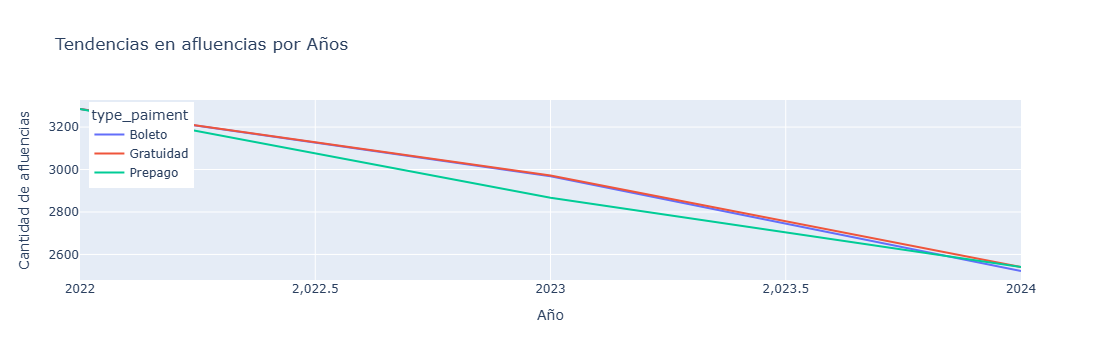

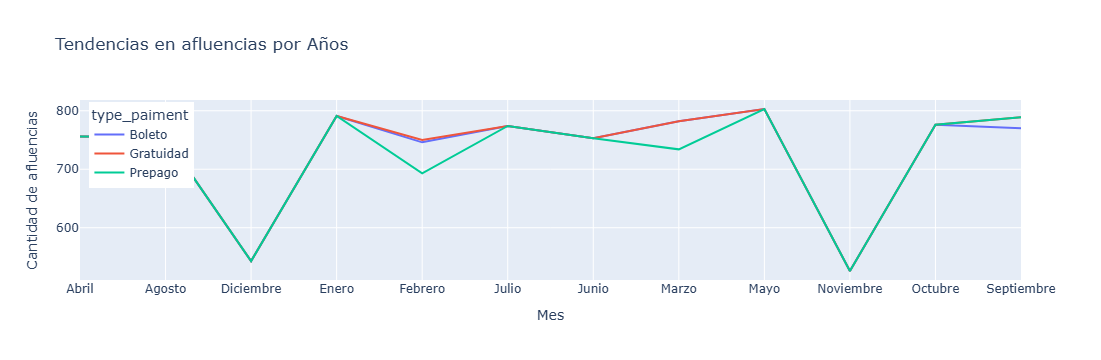

In [54]:
import pandas as pd
import plotly.graph_objects as go

#  'tendencias'
# 
tendencias = df.groupby(['type_paiment','month'])['affluence'].count().reset_index()

# Crear una figura
fig = go.Figure()

# Iterar a través de países únicos
for pais in tendencias['type_paiment'].unique():
    # Filtrar datos para el país actual
    data_pais = tendencias[tendencias['type_paiment'] == pais]
    
    # Agregar una línea para cada país
    fig.add_trace(go.Scatter(
        x=data_pais['month'],
        y=data_pais['affluence'],
        mode='lines',
        name=pais
    ))

# Personalizar el diseño del gráfico
fig.update_layout(
    title='Tendencias en afluencias por Años',
    xaxis_title='Mes',
    yaxis_title='Cantidad de afluencias',
    legend_title_text='type_paiment',
    legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=0.01
    )
)

# Agregar líneas de cuadrícula
fig.update_xaxes(showgrid=True)
fig.update_yaxes(showgrid=True)

# Mostrar el gráfico
fig.show()

# Grafico de dispersión para observar la relación entre variables

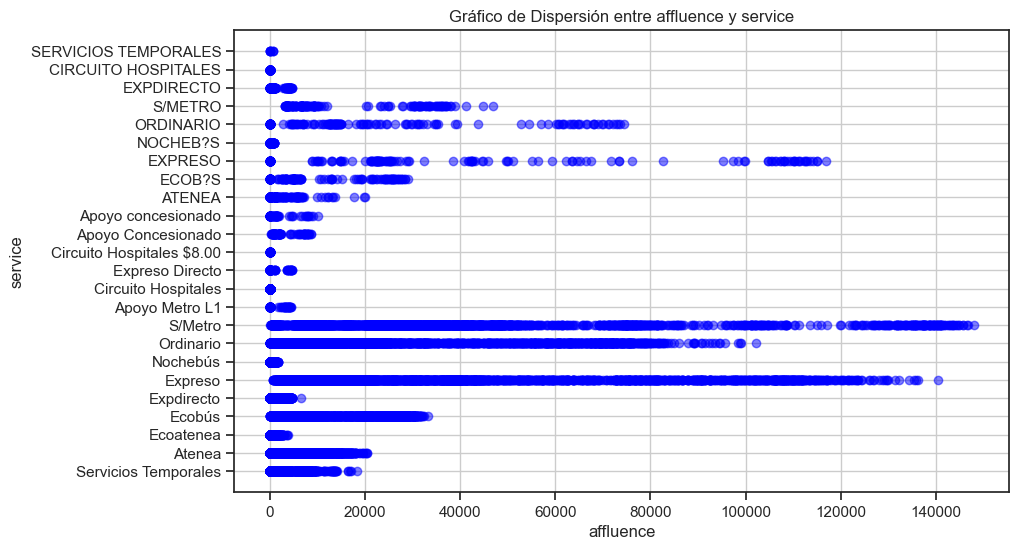

In [59]:

# Elegir las dos columnas numéricas que deseas comparar
columna_y= 'service'
columna_x= 'affluence'

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(df[columna_x], df[columna_y], alpha=0.5, color='blue')
plt.title(f'Gráfico de Dispersión entre {columna_x} y {columna_y}')
plt.xlabel(columna_x)
plt.ylabel(columna_y)
plt.grid(True)
plt.show()

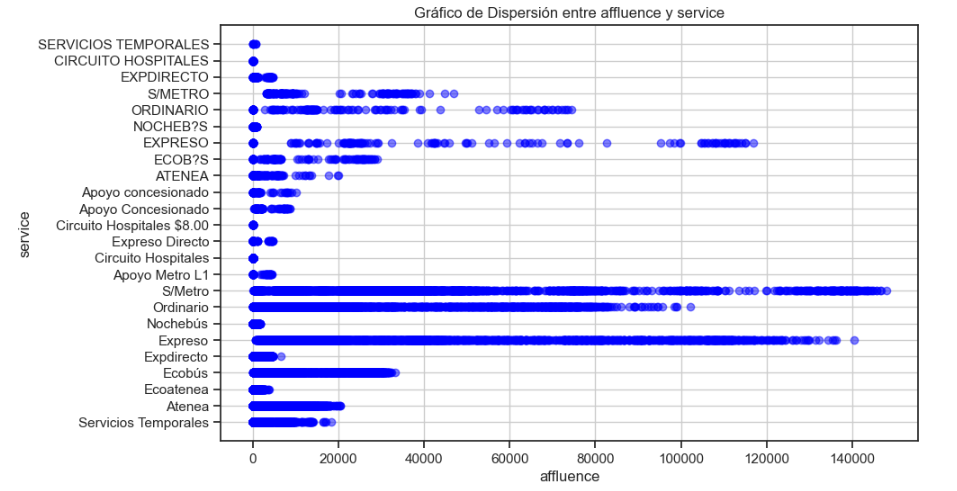

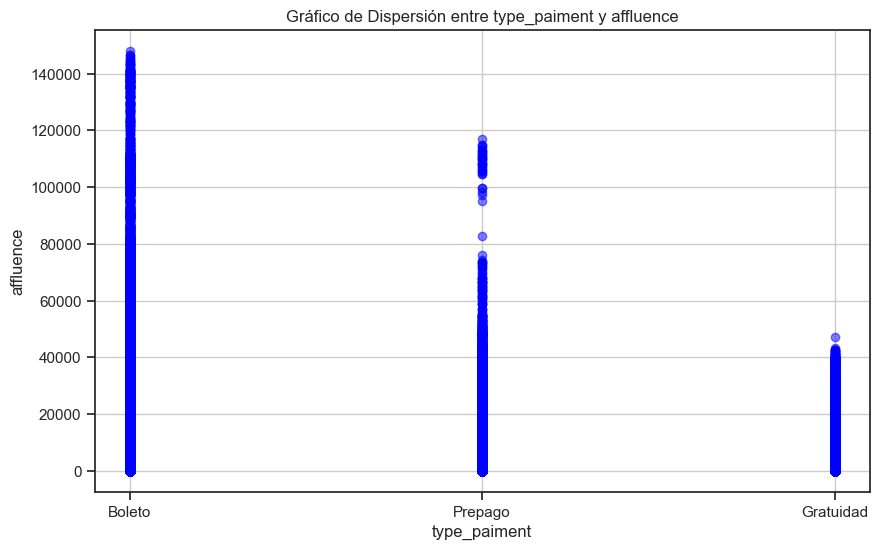

In [57]:

# Elegir las dos columnas numéricas que deseas comparar
columna_x = 'type_paiment'
columna_y = 'affluence'

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(df[columna_x], df[columna_y], alpha=0.5, color='blue')
plt.title(f'Gráfico de Dispersión entre {columna_x} y {columna_y}')
plt.xlabel(columna_x)
plt.ylabel(columna_y)
plt.grid(True)
plt.show()

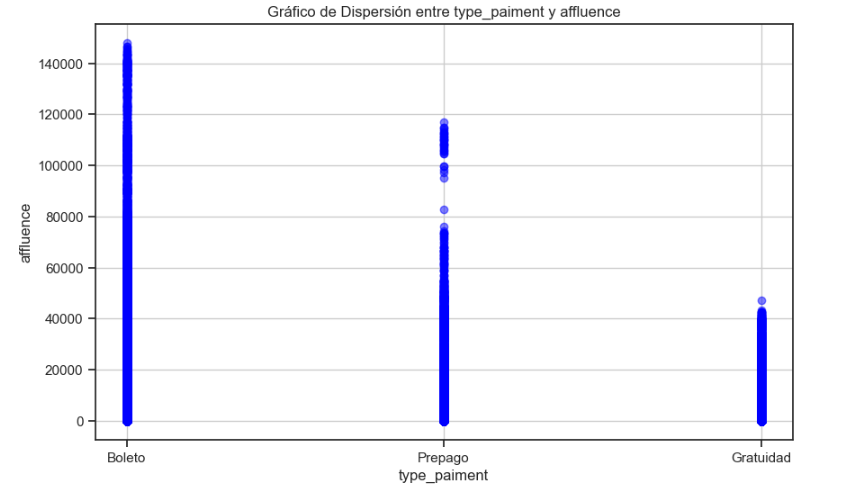

# Mapa de Calor de Variables numericas

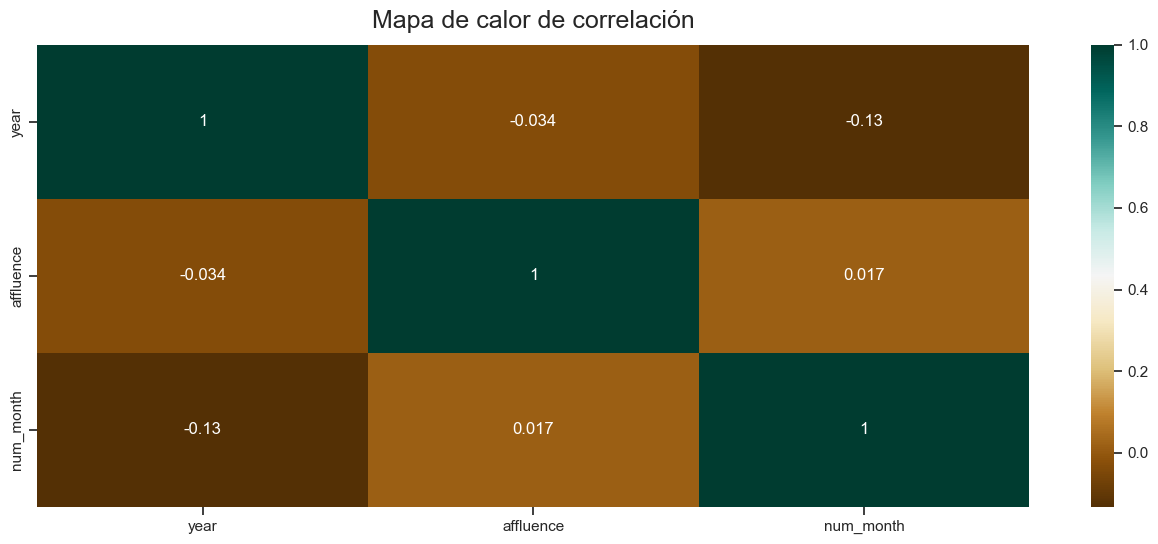

In [58]:
# Excluir columnas no numéricas
numeric_df = df.select_dtypes(include=[np.number])

# Crear el mapa de calor de correlación
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(numeric_df.corr(), annot=True, cmap='BrBG')
heatmap.set_title('Mapa de calor de correlación', fontdict={'fontsize': 18}, pad=12)
plt.show()


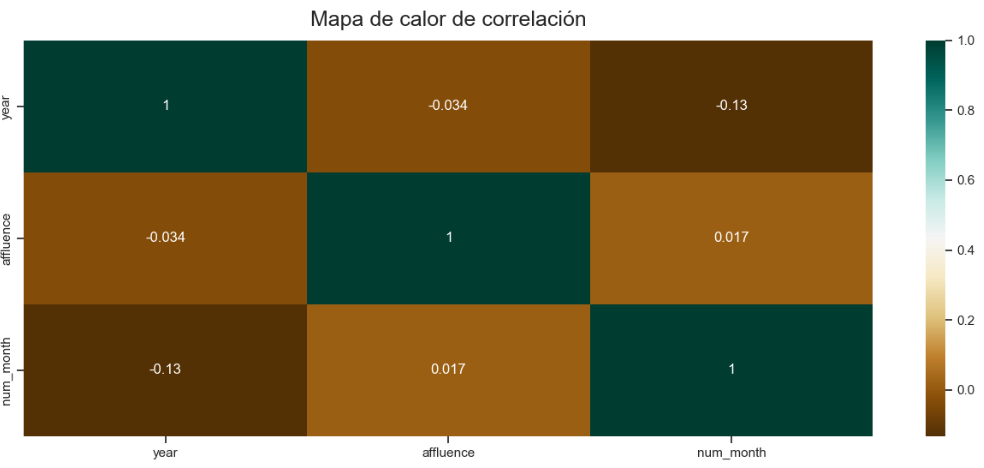